In [0]:
import xgboost as xgb
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
import itertools

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [0]:
def plot_confusion_matrix(cm,p,classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def show_data(cm, print_res = 0):
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    if print_res == 1:
        print('Precision =     {:.3f}'.format(tp/(tp+fp)))
        print('Recall (TPR) =  {:.3f}'.format(tp/(tp+fn)))
        print('Fallout (FPR) = {:.3e}'.format(fp/(fp+tn)))
    return tp/(tp+fp), tp/(tp+fn), fp/(fp+tn)

def show_result_prediction(y_test,y_pred,p=0.5,target_names=['no car', 'car']):
    print(classification_report(y_test, y_pred>p, target_names=['no car', 'car']))
    cm = confusion_matrix(y_test, y_pred>p)
    plot_confusion_matrix(cm, p,target_names )
    pr, tpr, fpr = show_data(cm, print_res = 1);

In [0]:
pre = "/content/drive/My Drive/Colab Notebooks/data/"
file_dir=["data1_false.csv","data2_false.csv","data1_true.csv","data2_true.csv"]
file_data=pd.DataFrame()
for file in file_dir:
    file1 = pd.read_csv(pre+file,delimiter=";")
    file_data=file_data.append(file1,ignore_index=True)

In [0]:
file_data

,Ot,Dt,DUREE,NBTRAJTC,dist,dist_center_in,dist_center_out,parking
0,43200.0,44100.0,900.0,1.0,1200.000000,1254.143388,854.603809,0
1,32400.0,34200.0,1800.0,2.0,2319.482701,854.603809,1580.831194,0
2,30600.0,32400.0,1800.0,1.0,1486.606875,669.042132,2144.043055,0
3,30600.0,32700.0,2100.0,2.0,6198.386887,1246.132095,5197.798148,0
4,27000.0,30000.0,3000.0,2.0,7940.403012,1156.171295,6913.416633,0
...,...,...,...,...,...,...,...,...
14345,63000.0,68400.0,5400.0,2.0,31560.101394,5763.445947,37254.817135,1
14346,69000.0,69300.0,300.0,1.0,360.555128,27156.448443,27481.272540,1
14347,57600.0,64800.0,7200.0,1.0,45449.312426,2373.943120,47684.728346,1
14348,72900.0,73500.0,600.0,2.0,2400.000000,26799.707167,28029.794151,1


In [0]:
y=np.array(file_data['parking'])
x=np.array(file_data[file_data.columns[0:7]])

In [0]:
x=preprocessing.scale(x)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [0]:
neg, pos = np.bincount(y_train)
pos/neg

0.08434872957400585

In [0]:
len([1 for i in range(pos+neg)])
pos+neg

11480

In [0]:
dtrain=xgb.DMatrix(data = X_train,label = y_train)
dtrain_weight=xgb.DMatrix(data = X_train,label = y_train,weight=[1 for i in range(pos+neg)])

In [0]:
dtest = xgb.DMatrix(data = X_test,label=y_test)

In [0]:
param = {'max_depth':8, 'eta':0.02, 'objective':'binary:logistic','scale_pos_weight':neg/pos,'max_delta_step':1,'eval_metric':'auc' ,'tree_method':'gpu_hist',}
evallist = [(dtest, 'eval'), (dtrain, 'train')]

bst = xgb.train(param, dtrain, num_boost_round=2000,evals =evallist)

[0]	eval-auc:0.767896	train-auc:0.868154
[1]	eval-auc:0.768765	train-auc:0.870496
[2]	eval-auc:0.771971	train-auc:0.872447
[3]	eval-auc:0.772098	train-auc:0.874076
[4]	eval-auc:0.770519	train-auc:0.875499
[5]	eval-auc:0.775662	train-auc:0.875509
[6]	eval-auc:0.775597	train-auc:0.875522
[7]	eval-auc:0.791954	train-auc:0.879001
[8]	eval-auc:0.792634	train-auc:0.881748
[9]	eval-auc:0.798133	train-auc:0.88266
[10]	eval-auc:0.801725	train-auc:0.886545
[11]	eval-auc:0.801987	train-auc:0.887079
[12]	eval-auc:0.800233	train-auc:0.889217
[13]	eval-auc:0.80127	train-auc:0.894038
[14]	eval-auc:0.801925	train-auc:0.896481
[15]	eval-auc:0.803307	train-auc:0.897991
[16]	eval-auc:0.80456	train-auc:0.900183
[17]	eval-auc:0.807521	train-auc:0.90203
[18]	eval-auc:0.809292	train-auc:0.90421
[19]	eval-auc:0.81242	train-auc:0.905254
[20]	eval-auc:0.813212	train-auc:0.905964
[21]	eval-auc:0.816986	train-auc:0.907241
[22]	eval-auc:0.816572	train-auc:0.908445
[23]	eval-auc:0.820826	train-auc:0.90916
[24]	eval

              precision    recall  f1-score   support

      no car       0.93      0.95      0.94      2655
         car       0.16      0.12      0.13       215

    accuracy                           0.89      2870
   macro avg       0.55      0.53      0.54      2870
weighted avg       0.87      0.89      0.88      2870



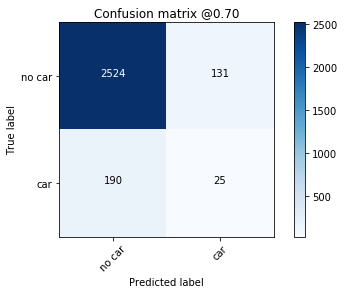

Precision =     0.160
Recall (TPR) =  0.116
Fallout (FPR) = 4.934e-02


In [0]:
preds = bst.predict(dtest)
show_result_prediction(y_test,preds,p=0.7)

              precision    recall  f1-score   support

      no car       1.00      0.96      0.98     10587
         car       0.71      1.00      0.83       893

    accuracy                           0.97     11480
   macro avg       0.85      0.98      0.90     11480
weighted avg       0.98      0.97      0.97     11480



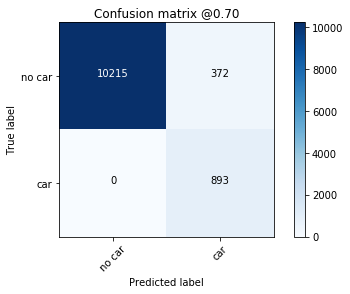

Precision =     0.706
Recall (TPR) =  1.000
Fallout (FPR) = 3.514e-02


In [0]:
pred_train = bst.predict(dtrain)
show_result_prediction(y_train,pred_train,p=0.7)

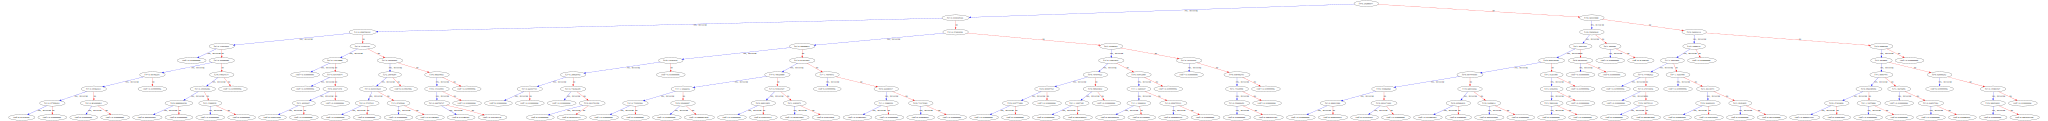

In [0]:
xgb.to_graphviz(bst, num_trees=6)

In [0]:
#threeshold
#'max_delta_step'
#objectif

In [0]:
# bst.save_model('0001.model')
# clf = xgb.Booster({'nthread': 4})  # init model
# clf.load_model('0001.model')  # load data
# pred_train = clf.predict(dtrain)
# show_result_prediction(y_train,pred_train,p=0.7)

Grid Search for Xgboost

In [0]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [0]:
params = {
            'learning_rate': [0.01,0.02,0.03],
            'eval_metric': ['auc'],
            'scale_pos_weight': [neg/pos],
            'max_delta_step': [1,2,3,4],
            'max_depth': [8],
        }

skf = StratifiedKFold(n_splits=10, shuffle = True)

In [0]:
xgb_model = xgb.XGBClassifier(objective = "binary:logistic")

In [0]:
clf = GridSearchCV(xgb_model, params,scoring='f1')

In [0]:
clf.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'eval_metric': ['auc'],
                         'learning_rate': [0.01, 0.02, 0.03],
                         'max_delta_step': [1, 2, 3, 4], 'max_d

In [0]:
clf.best_params_

{'eval_metric': 'auc',
 'learning_rate': 0.03,
 'max_delta_step': 1,
 'max_depth': 8,
 'scale_pos_weight': 11.855543113101904}

In [0]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_check_is_fitted',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_required_parameters',
 '_run_search',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_dispatch',
 'predict',
 'predict_log_proba',

              precision    recall  f1-score   support

      no car       0.95      0.94      0.94      2655
         car       0.30      0.33      0.31       215

    accuracy                           0.89      2870
   macro avg       0.62      0.63      0.63      2870
weighted avg       0.90      0.89      0.90      2870



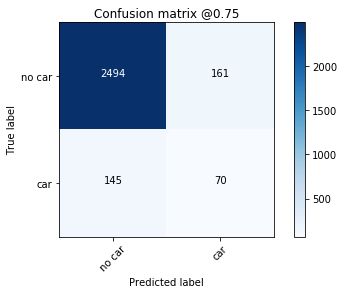

Precision =     0.303
Recall (TPR) =  0.326
Fallout (FPR) = 6.064e-02


In [0]:
y_pred=clf.predict_proba(X_test)
y_pred[:,1]
show_result_prediction(y_test,y_pred[:,1],p=0.75)